# Analytics - Envisage 2021
Team Members - 1. Vikas Kr Saw
               2. Priyasu Guin
               3. Uttkarsh Ranjan

Problem Statement:
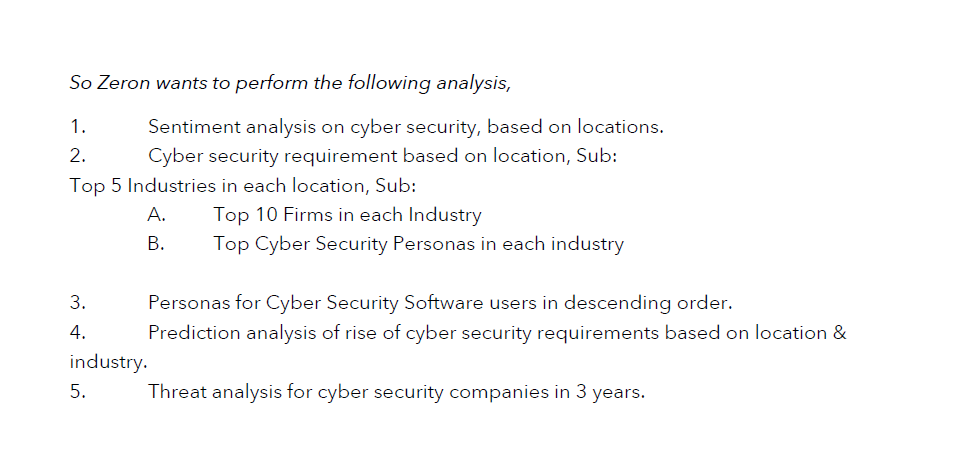

# Importing All the Important Libraries

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading Dataset

In [149]:
#read the dataset cybersecurity.csv
df = pd.read_csv("/content/cybersecurity.csv")
df.head()

,Company,Location,Industry,Users,Rating
0,(ISC)²,Florida,Healthcare,1800.0,5.0
1,10 Dot,Africa,Information Technology,NaN,4.8
2,1Cyber Pty Ltd,Sydney,Manufacturing,4900.0,5.0
3,1Password,Canada,Information Technology,10000.0,4.4
4,3i International,Texas,Manufacturing,500.0,5.0


In [150]:
df.shape  #No of Columns = 5 | No of Rows = 832

(832, 5)

In [151]:
#Description of the data for understanding the nature of the data
df.describe()

,Users,Rating
count,688.000000,708.000000
mean,2844.767442,4.698446
std,2871.397107,0.453820
min,30.000000,1.800000
25%,1100.000000,4.500000
50%,2500.000000,4.900000
75%,4025.000000,5.000000
max,40000.000000,5.000000


# Checking Missing Data

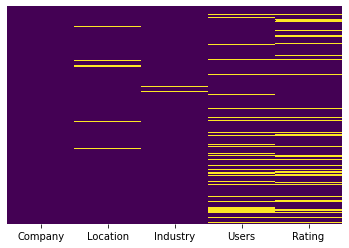

In [152]:
#Plotting missing data places on heatmap
df.isna()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#yellow lines represent missing data

In [153]:
#Replacing Missing Data in Location and Industry Column with 'Null'
df['Location']=df['Location'].fillna('Null')
df['Industry']=df['Industry'].fillna('Null')

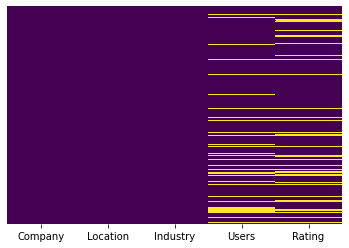

In [154]:
#Again checking missing data. Now there are no missing data in Location and Industry Column
df.isna()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [155]:
#Replacing Missing Data in Users Column with median and Rating Column with mean.
df['Users'].fillna(int(df['Users'].median()), inplace=True)
df['Rating'].fillna(int(df['Rating'].mean()), inplace=True)

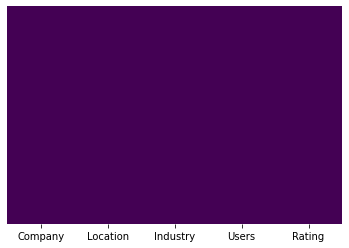

In [156]:
#Again checking for missing data. Now there are no missing data
df.isna()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [157]:
#Checking Numerically if there is any missing data
#As all the values are zero. Therefore, there are no misiing data.
print(df.isnull().sum())

Company     0
Location    0
Industry    0
Users       0
Rating      0
dtype: int64


# Point 1 --> Sentiment Analysis on Cyber Security based on Locations

### Number of Cyber Security Companies in each Location

In [158]:
#Prints the number of Cyber Security companies in top 25 locations
df_loc = df["Location"].value_counts()
df_loc.head(25)

California       134
India             85
New York          63
Texas             32
Massachusetts     27
Ukraine           26
UK                25
Illinois          25
Israel            25
Virginia          21
Null              20
Canada            19
Washington        18
Colorado          17
Georgia           16
Florida           14
Maryland          14
Poland            13
England           10
Toronto            9
New Jersey         8
Minnesota          7
Arizona            6
Pennsylvania       5
Wroclaw            5
Name: Location, dtype: int64

### Cyber Security companies involved in each Industry

In [159]:
df_ind = df["Industry"].value_counts()
df_ind
# Hence, Maximum number of cyber security companies are involved in mainly :
# IT industry, Financial Services, Government Sector and Retail.

Information Technology              211
Financial Services                  129
Government                          107
Retail                              100
Healthcare                           90
Manufacturing                        87
Education                            86
Business                              8
Software                              7
Null                                  5
Identity Driven Cyber Resilience      1
Network & Endpoint Security           1
Name: Industry, dtype: int64

### Graphical Analysis

In [160]:
industry_list = ["Information Technology","Financial Services","Government","Retail","Healthcare","Manufacturing","Education","Business"]

def plot_industry_count(industry):
    industry_group = df.groupby(["Industry"])
    x = industry_group.get_group(industry)
    x = x["Location"].value_counts().sort_values(ascending=False).head(20)
    bar_graph = x.plot.bar(color="red",title=industry)
    

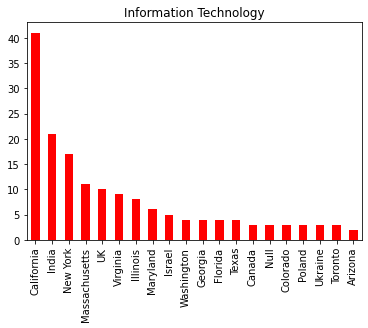

In [161]:
#Bar Plot - Number of Cyber Security Companies involved in Information Technology based on Location
plot_industry_count(industry_list[0])

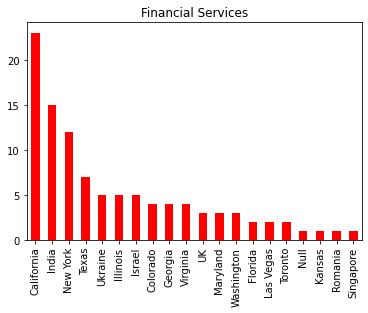

In [162]:
#Bar Plot - Number of Cyber Security Companies involved in Financial Services based on Location
plot_industry_count(industry_list[1])

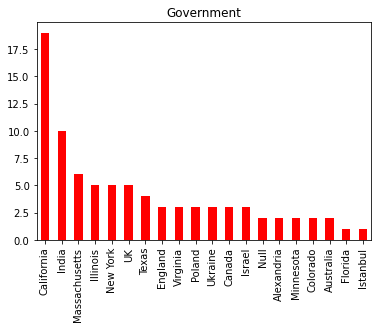

In [163]:
#Bar Plot - Number of Cyber Security Companies involved in Government Sector based on Location
plot_industry_count(industry_list[2])

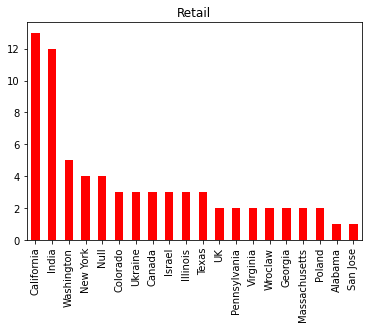

In [164]:
#Bar Plot - Number of Cyber Security Companies involved in Retail Industry based on Location
plot_industry_count(industry_list[3])

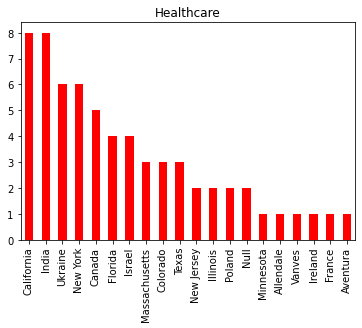

In [165]:
#Bar Plot - Number of Cyber Security Companies involved in Healthcare Industry based on Location
plot_industry_count(industry_list[4])

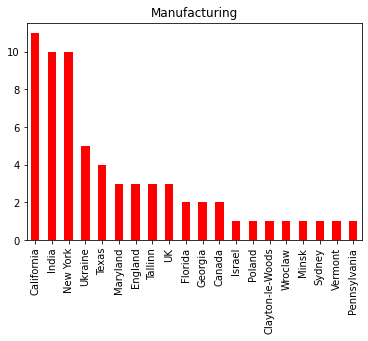

In [166]:
#Bar Plot - Number of Cyber Security Companies involved in Manufacturing Industry based on Location
plot_industry_count(industry_list[5])

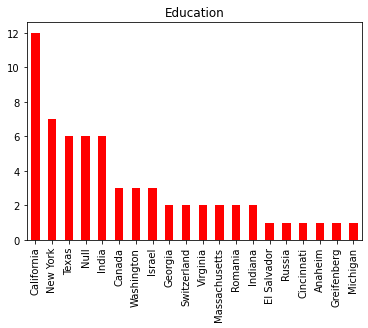

In [167]:
#Bar Plot - Number of Cyber Security Companies involved in Education Industry based on Location
plot_industry_count(industry_list[6])

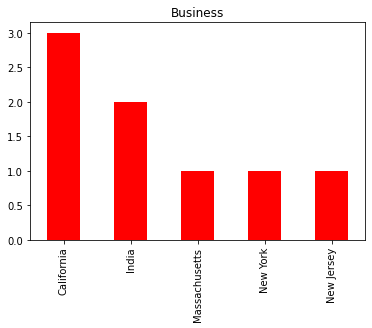

In [168]:
#Bar Plot - Number of Cyber Security Companies involved in Business Industry based on Location
plot_industry_count(industry_list[7])

### Sentiment Analysis on the basis of Rating

Average Rating of Cyber Security companies in each industry and each location is found and a separate column is made as "Avg Rating" for storing the values.

In [169]:
rating_data = []

def mean_rating(industry):
    industry_group = df.groupby(["Industry"])
    x = industry_group.get_group(industry).groupby("Location")
    for loc, data in x:
        obj = {
            "Industry" : industry,
            "Location" : loc,
            "Avg Rating" : data["Rating"].mean()
        }
        rating_data.append(obj)
        
for i in industry_list:
    mean_rating(i)

rating_df = pd.DataFrame(rating_data)
rating_df.dropna(subset = ["Avg Rating"],inplace=True)
rating_df

,Industry,Location,Avg Rating
0,Information Technology,Singapore,4.000000
1,Information Technology,Africa,4.800000
2,Information Technology,Amsterdam,5.000000
3,Information Technology,Arizona,4.750000
4,Information Technology,Australia,5.000000
...,...,...,...
330,Business,California,4.633333
331,Business,India,4.750000
332,Business,Massachusetts,5.000000
333,Business,New Jersey,5.000000


### Sentiment Analysis through Bar Graph

Plotting the data 

In [170]:
#plot_rating function definition
def plot_rating(industry):
    x = rating_df[rating_df["Industry"] == industry]
    x = x.head(20)
    plt.bar(x["Location"],x["Avg Rating"],color='g')
    plt.xticks(rotation=90)
    plt.title(industry)
    plt.xlabel("Location")
    plt.ylabel("Avg Rating")

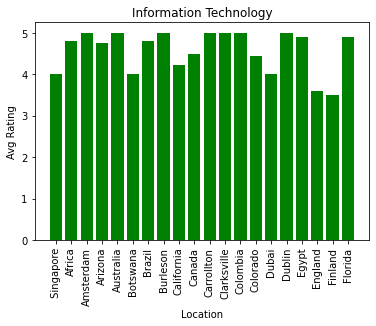

In [171]:
#Sentiment Analysis in Information Technology Industry
plot_rating(industry_list[0])

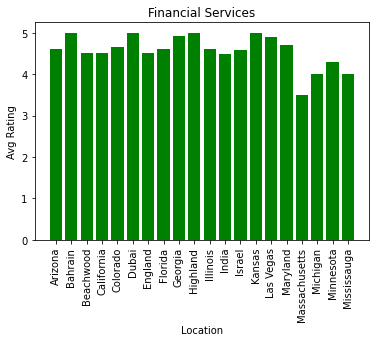

In [172]:
#Sentiment Analysis in Financial Services Industry
plot_rating(industry_list[1])

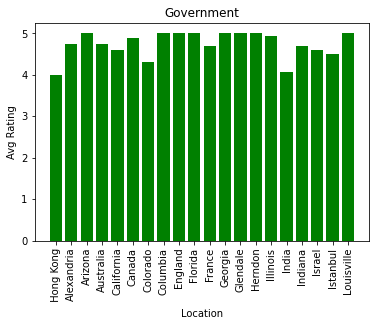

In [173]:
#Sentiment Analysis in Government Industry
plot_rating(industry_list[2])

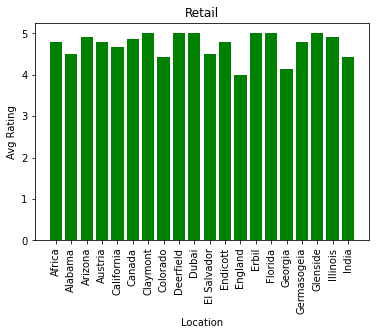

In [174]:
#Sentiment Analysis in Retail Industry
plot_rating(industry_list[3])

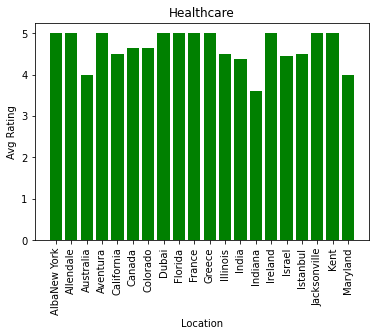

In [175]:
#Sentiment Analysis in Healthcare Industry
plot_rating(industry_list[4])

Other industries have very less requirement of Cyber Security so their sentiment analysis is not significant.

# Point 2 -->  Cyber security requirement based on location, Sub:
Top 5 Industries in each location, Sub:

        A. Top 10 Firms in each Industry
        B. Top Cyber Security Personas in each industry

## Top 3 Locations with cybersecurity requirement

In [176]:
df.Location.value_counts().head(3)
#The top three locations are California, India and New York
#We will carry further analysis on these three locations
#We are not considering other locations as they have very less data.

California    134
India          85
New York       63
Name: Location, dtype: int64

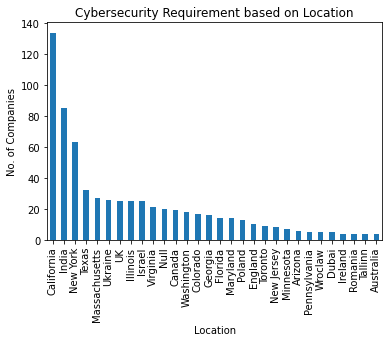

In [177]:
df.Location.value_counts().head(30).plot(kind='bar')
plt.xlabel("Location")
plt.ylabel("No. of Companies")
plt.title("Cybersecurity Requirement based on Location")
plt.show()

## **California**

In [178]:
#Setting a new dataset for All Cyber Security companies in California
location1 = df['Location'] == 'California'
location_data1= df[location1]
location_data1.head()

,Company,Location,Industry,Users,Rating
10,A10 Networks,California,Education,4600.0,4.6
11,A10 Networks,California,Government,2500.0,5.0
13,Abnormal Security,California,Government,300.0,3.5
22,Agari,California,Financial Services,800.0,3.5
30,AlienVault,California,Business,8000.0,4.9


### **Top 5 Industries in California**

In [179]:
location_data1.Industry.value_counts().head(5)

Information Technology    41
Financial Services        23
Government                19
Retail                    13
Education                 12
Name: Industry, dtype: int64

1. Top 10 firms in Information Technology- California

In [180]:
california_industry1 = location_data1['Industry'] == 'Information Technology'
location_data1[california_industry1].sort_values(by='Users', ascending=False).head(10)
#Top Cyber Security Persona in Information Technology, California = Qualys

,Company,Location,Industry,Users,Rating
568,Qualys,California,Information Technology,19000.0,3.5
376,Intel Security Group,California,Information Technology,15000.0,5.0
468,McAfee,California,Information Technology,15000.0,4.1
778,ValiMail,California,Information Technology,10000.0,3.2
787,Vectra,California,Information Technology,8000.0,3.8
518,OneLogin,California,Information Technology,5500.0,4.3
134,Checkr,California,Information Technology,5100.0,4.0
143,"ClearFuze Networks, Inc.",California,Information Technology,4600.0,5.0
109,"Breeze IT, Inc.",California,Information Technology,4500.0,5.0
497,Netskope,California,Information Technology,3000.0,4.9


2. Top 10 firms in Financial Services- California

In [181]:
california_industry2 = location_data1['Industry'] == 'Financial Services'
location_data1[california_industry2].sort_values(by='Users', ascending=False).head(10)
#Top Cyber Security Persona in Financial Services, California = Coalition

,Company,Location,Industry,Users,Rating
153,Coalition,California,Financial Services,8000.0,4.9
66,Axis Security,California,Financial Services,6000.0,4.0
514,Okta,California,Financial Services,5000.0,4.6
686,SPsoft,California,Financial Services,4300.0,4.8
823,ZAG Technical Services,California,Financial Services,4100.0,5.0
174,CPI Solutions,California,Financial Services,4000.0,5.0
529,Orca Security,California,Financial Services,4000.0,3.5
485,MNS Group,California,Financial Services,3900.0,5.0
482,Mitek,California,Financial Services,2500.0,4.0
775,Unit21,California,Financial Services,2500.0,4.5


3. Top 10 firms in Government Sector- California

In [182]:
california_industry3 = location_data1['Industry'] == 'Government'
location_data1[california_industry3].sort_values(by='Users', ascending=False).head(10)
#Top Cyber Security Persona in Government sector, California = DataEndure

,Company,Location,Industry,Users,Rating
212,DataEndure,California,Government,4900.0,4.8
394,IT Hatch Solutions Inc.,California,Government,3400.0,5.0
693,SugarShot,California,Government,3000.0,4.8
454,Lookout,California,Government,3000.0,5.0
604,RiskIQ,California,Government,2700.0,5.0
11,A10 Networks,California,Government,2500.0,5.0
771,Ubiq Security,California,Government,2500.0,5.0
617,Safe Security (formerly Lucideus),California,Government,2500.0,5.0
539,Palo Alto Networks,California,Government,2500.0,4.0
795,"Voyagent, Inc.",California,Government,2300.0,4.0


4. Top 10 firms in Retail Industry- California

In [183]:
california_industry4 = location_data1['Industry'] == 'Retail'
location_data1[california_industry4].sort_values(by='Users', ascending=False).head(10)
#Top Cyber Security Persona in Retail Industry, California = Cloudflare

,Company,Location,Industry,Users,Rating
146,Cloudflare,California,Retail,25000.0,4.7
73,Barracuda,California,Retail,8000.0,4.5
279,FenceCore IT Solutions,California,Retail,4400.0,4.8
96,BlairSammons.com,California,Retail,4300.0,5.0
391,Isovalent,California,Retail,4000.0,5.0
646,SentinelOne,California,Retail,4000.0,4.8
190,CyberDuo,California,Retail,2800.0,5.0
616,Safe Base,California,Retail,2500.0,4.0
694,Sumo Logic,California,Retail,2100.0,3.6
76,"Be Structured Technology Group, Inc.",California,Retail,1900.0,5.0


5. Top 10 firms in Education Industry- California

In [184]:
california_industry5 = location_data1['Industry'] == 'Education'
location_data1[california_industry5].sort_values(by='Users', ascending=False).head(10)
#Top Cyber Security Persona in Education Industry, California = Cisco

,Company,Location,Industry,Users,Rating
139,Cisco,California,Education,6000.0,4.8
10,A10 Networks,California,Education,4600.0,4.6
736,The Azure Cloud Experts,California,Education,4600.0,5.0
270,Exabeam,California,Education,3000.0,5.0
306,GoGuardian,California,Education,2500.0,4.0
110,briteCITY,California,Education,2400.0,4.7
38,ANiMODUS,California,Education,1700.0,5.0
441,Leverage IT Consulting,California,Education,1400.0,5.0
220,"DCG Technical Solutions, Inc",California,Education,1000.0,5.0
293,Framework Security,California,Education,500.0,5.0


## **India**

In [185]:
#Setting a new dataset for All Cyber Security companies in India
location2 = df['Location'] == 'India'
location_data2= df[location2]
location_data2.head()

,Company,Location,Industry,Users,Rating
21,adyog,India,Information Technology,2500.0,4.5
27,Alchetron,India,Information Technology,10000.0,5.0
28,Aleph Tav Technologies Pvt Ltd,India,Education,2500.0,4.0
36,Anblicks,India,Healthcare,3300.0,5.0
41,AppSecure,India,Business,3200.0,4.5


### **Top 5 Industries in India**

In [186]:
location_data2.Industry.value_counts().head(5)

Information Technology    21
Financial Services        15
Retail                    12
Manufacturing             10
Government                10
Name: Industry, dtype: int64

1. Top 10 firms in Information Technology- India

In [187]:
india_industry1 = location_data2['Industry'] == 'Information Technology'
location_data2[india_industry1].sort_values(by='Users', ascending=False).head(10)
#Top Cyber Security Persona in Information Technology, India = Alchetron

,Company,Location,Industry,Users,Rating
27,Alchetron,India,Information Technology,10000.0,5.0
412,K7 Computing,India,Information Technology,5000.0,4.5
300,Geeks Solutions,India,Information Technology,4800.0,4.9
361,ImpactQA,India,Information Technology,4500.0,4.9
596,Reputation BUILDUP,India,Information Technology,4500.0,5.0
173,ConvoSync Solutions,India,Information Technology,4400.0,5.0
792,Vervali Systems Pvt Ltd,India,Information Technology,4200.0,4.4
274,Exploit Hunters India,India,Information Technology,3400.0,5.0
48,ARMOUR INFOSEC PRIVATE LIMITED,India,Information Technology,3200.0,4.0
818,Xeliumtech Solutions,India,Information Technology,3100.0,4.5


2. Top 10 firms in Financial Services- India

In [188]:
india_industry2 = location_data2['Industry'] == 'Financial Services'
location_data2[india_industry2].sort_values(by='Users', ascending=False).head(10)
#Top Cyber Security Persona in Financial Services, India = Infrassist Technologies Pvt. Ltd.

,Company,Location,Industry,Users,Rating
371,Infrassist Technologies Pvt. Ltd.,India,Financial Services,4600.0,4.5
342,IARM Information Security,India,Financial Services,4400.0,5.0
820,XenonStack,India,Financial Services,4300.0,5.0
584,Real Secure IT Infrastructure LLC,India,Financial Services,3900.0,4.5
577,Rapid7,India,Financial Services,3800.0,5.0
808,WeSecureApp,India,Financial Services,3300.0,4.8
44,Arcon TechSolution,India,Financial Services,2500.0,5.0
671,SNDK Corp,India,Financial Services,1700.0,5.0
489,MSPAssist,India,Financial Services,1400.0,4.8
802,Webshup,India,Financial Services,1200.0,4.8


3. Top 10 firms in Retail Industry- India

In [189]:
india_industry3 = location_data2['Industry'] == 'Retail'
location_data2[india_industry3].sort_values(by='Users', ascending=False).head(10)
#Top Cyber Security Persona in Retail Industry, India = Everdata Technologies

,Company,Location,Industry,Users,Rating
268,Everdata Technologies,India,Retail,4900.0,5.0
492,Ndimensionz Solutions Pvt ltd,India,Retail,4700.0,4.0
622,Sattrix,India,Retail,4600.0,5.0
791,Vervali Systems Pvt Ltd,India,Retail,4500.0,4.4
390,ISHIR,India,Retail,4400.0,5.0
481,MIT Group,India,Retail,4300.0,4.8
784,Varutra Consulting Pvt. Ltd.,India,Retail,3900.0,4.0
465,MattsenKumar LLC,India,Retail,2700.0,4.1
630,Seconaize,India,Retail,2500.0,4.0
309,Great Software Laboratory,India,Retail,1600.0,4.0


4. Top 10 firms in Manufacturing Industry- India

In [190]:
india_industry4 = location_data2['Industry'] == 'Manufacturing'
location_data2[india_industry4].sort_values(by='Users', ascending=False).head(10)
#Top Cyber Security Persona in Manufacturing Industry, India = XenonStack

,Company,Location,Industry,Users,Rating
819,XenonStack,India,Manufacturing,4700.0,5.0
821,Your Server Doctor,India,Manufacturing,4600.0,5.0
196,Cyberops Infosec LLP,India,Manufacturing,4500.0,4.0
751,ToggleNow Software Solutions Pvt Ltd.,India,Manufacturing,4300.0,4.5
733,Terralogic,India,Manufacturing,4100.0,4.0
716,Technologics and Controls,India,Manufacturing,2400.0,4.8
162,Compufy Technolab LLP,India,Manufacturing,2300.0,5.0
322,Happiest Minds Technologies,India,Manufacturing,1600.0,4.5
258,Enfini Labs Tech Consultant,India,Manufacturing,900.0,5.0
352,ilantus,India,Manufacturing,500.0,5.0


5. Top 10 firms in Government Sector- India

In [191]:
india_industry5 = location_data2['Industry'] == 'Government'
location_data2[india_industry5].sort_values(by='Users', ascending=False).head(10)
#Top Cyber Security Persona in Government Sector, India = Techvedic

,Company,Location,Industry,Users,Rating
721,Techvedic,India,Government,4600.0,4.0
136,CiELO Technologies,India,Government,4000.0,4.5
186,Cyber Security Hive,India,Government,3100.0,4.5
746,Threatsys Technologies Pvt. Ltd.,India,Government,2500.0,5.0
119,Calpion,India,Government,2000.0,5.0
429,Kratikal,India,Government,200.0,5.0
60,Aurionpro,India,Government,100.0,4.0
458,MailXaminer,India,Government,60.0,3.5
456,Lucideus,India,Government,50.0,1.8
711,TECHERA SECURITIES,India,Government,30.0,3.5


## **New York**

In [192]:
#Setting a new dataset for All Cyber Security companies in New York
location3 = df['Location'] == 'New York'
location_data3= df[location3]
location_data3.head()

,Company,Location,Industry,Users,Rating
8,6D Global Technologies,New York,Retail,4000.0,4.0
9,7Clouds,New York,Financial Services,1200.0,4.8
15,Accenture,New York,Business,5000.0,5.0
33,Alphaserve Technologies,New York,Information Technology,2500.0,4.0
62,Avanan,New York,Information Technology,200.0,4.6


### **Top 5 Industries in New York**

In [193]:
location_data3.Industry.value_counts().head(5)

Information Technology    17
Financial Services        12
Manufacturing             10
Education                  7
Healthcare                 6
Name: Industry, dtype: int64

1. Top 10 firms in Information Technology- New York

In [194]:
NY_industry1 = location_data3['Industry'] == 'Information Technology'
location_data3[NY_industry1].sort_values(by='Users', ascending=False).head(10)
#Top Cyber Security Persona in Information Technology, New York = Deloitte

,Company,Location,Industry,Users,Rating
225,Deloitte,New York,Information Technology,8000.0,4.8
65,Axionus,New York,Information Technology,4300.0,4.0
33,Alphaserve Technologies,New York,Information Technology,2500.0,4.0
267,Ethyca,New York,Information Technology,2500.0,5.0
783,Varonis Systems,New York,Information Technology,2500.0,4.0
657,Siemplify,New York,Information Technology,2500.0,4.0
641,SecurityScorecard,New York,Information Technology,2500.0,3.9
601,Reval,New York,Information Technology,2500.0,4.0
340,HYPR,New York,Information Technology,2500.0,4.8
244,Dragos,New York,Information Technology,2500.0,4.0


2. Top 10 firms in Financial Services- New York

In [195]:
NY_industry2 = location_data3['Industry'] == 'Financial Services'
location_data3[NY_industry2].sort_values(by='Users', ascending=False).head(10)
#Top Cyber Security Persona in Financial Services, New York = HackerOne

,Company,Location,Industry,Users,Rating
319,HackerOne,New York,Financial Services,5000.0,5.0
457,M6iT,New York,Financial Services,4000.0,5.0
406,JS Technology Group,New York,Financial Services,3700.0,5.0
123,Carden IT LLC,New York,Financial Services,3300.0,5.0
170,Context Information Security,New York,Financial Services,3300.0,5.0
175,CRA | Computer Resources of America,New York,Financial Services,2900.0,4.9
564,Prove,New York,Financial Services,2500.0,4.3
758,Trail of Bits,New York,Financial Services,2500.0,4.0
431,Kualitatem Inc.,New York,Financial Services,1700.0,4.5
9,7Clouds,New York,Financial Services,1200.0,4.8


3. Top 10 firms in Manufacturing Industry- New York

In [196]:
NY_industry3 = location_data3['Industry'] == 'Manufacturing'
location_data3[NY_industry3].sort_values(by='Users', ascending=False).head(10)
#Top Cyber Security Persona in Manufacturing Industry, New York = SCADAfence

,Company,Location,Industry,Users,Rating
625,SCADAfence,New York,Manufacturing,8000.0,4.6
249,Dysnix,New York,Manufacturing,4200.0,5.0
588,Red Key Solutions,New York,Manufacturing,4200.0,5.0
592,Reflexions,New York,Manufacturing,4200.0,5.0
440,Leveldesk,New York,Manufacturing,3500.0,4.9
399,iterasec,New York,Manufacturing,2900.0,5.0
141,Claroty,New York,Manufacturing,1000.0,4.4
355,Imagis,New York,Manufacturing,600.0,4.5
104,Booz Allen,New York,Manufacturing,500.0,4.8
382,IntSights,New York,Manufacturing,80.0,4.8


4. Top 10 firms in Education Industry- New York

In [197]:
NY_industry4 = location_data3['Industry'] == 'Education'
location_data3[NY_industry4].sort_values(by='Users', ascending=False).head(10)
#Top Cyber Security Persona in Education Industry, New York = IBM iX

,Company,Location,Industry,Users,Rating
343,IBM iX,New York,Education,6000.0,4.5
84,Bit by Bit Computer Consultants,New York,Education,4200.0,4.9
642,SecurityScorecard,New York,Education,3600.0,5.0
332,Herjavec Group,New York,Education,1800.0,5.0
325,Havoc Shield,New York,Education,500.0,5.0
67,Axonius,New York,Education,400.0,3.9
763,TRINUS Technologies,New York,Education,300.0,4.7


5. Top 10 firms in Healthcare Industry- New York

In [198]:
NY_industry5 = location_data3['Industry'] == 'Healthcare'
location_data3[NY_industry5].sort_values(by='Users', ascending=False).head(10)
#Top Cyber Security Persona in Healthcare Industry, New York = UnderDefense

,Company,Location,Industry,Users,Rating
774,UnderDefense,New York,Healthcare,3900.0,5.0
255,Electric,New York,Healthcare,3300.0,4.7
477,Middleground Technologies,New York,Healthcare,2900.0,5.0
217,Dathena Science,New York,Healthcare,2500.0,4.0
660,SimplicIT,New York,Healthcare,2500.0,5.0
360,ImpactQA,New York,Healthcare,1800.0,4.6


# Point 3 --> Personas for Cyber Security Software users in descending order.

Overall Sorting of Users

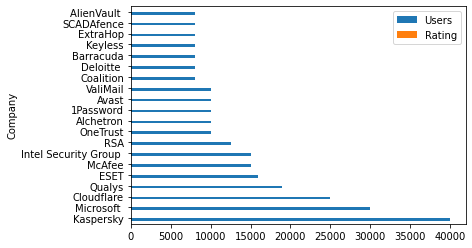

In [199]:
# Top 10 Cyber Security Companies with maximum users
df.sort_values(by='Users', ascending=False).head(20).plot(kind="barh", fontsize=10, x='Company')

# Point 4 --> Prediction analysis of rise of cyber security requirements based on location & industry.

For this we need a new dataset which has records of cyberattacks

In [200]:
#read the dataset cybersecurity.csv
data = pd.read_csv("/content/cyberattacks.csv")
data

,Entity,Location,Year,Records,Industry,Method
0,21st Century Oncology,USA,2016,2200000,Healthcare,hacked
1,Accendo Insurance Co.,USA,2011,175350,Healthcare,poor security
2,Acer,USA,2021,260000,Retail,hacked
3,Adobe Systems,USA,2013,152000000,Tech,hacked
4,Advocate Medical Group,USA,2013,4000000,Healthcare,lost / stolen media
...,...,...,...,...,...,...
228,Yahoo,USA,2013,3000000000,Web,hacked
229,Yahoo Japan,Japan,2013,22000000,"Tech, Web",hacked
230,Yahoo! Voices,USA,2012,450000,Web,hacked
231,Yale University,USA,2010,43000,Academic,accidentally published


In [201]:
#The dataset contains cyber attack records from the year 2011-2021
data.Year.value_counts()

2011    34
2013    30
2015    28
2014    25
2012    24
2018    22
2016    21
2010    20
2021    13
2017     8
2020     6
2019     2
Name: Year, dtype: int64

Most attacked Country in these 11 years

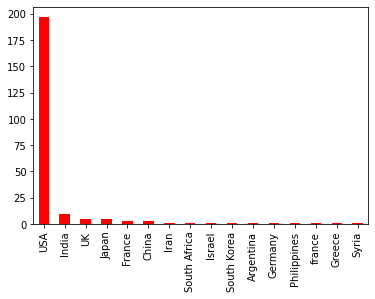

In [202]:
data.Location.value_counts().plot(kind='bar', color='red')
# Its clear from it that USA is the most attacked country.

Most attacked industry in these 11 years

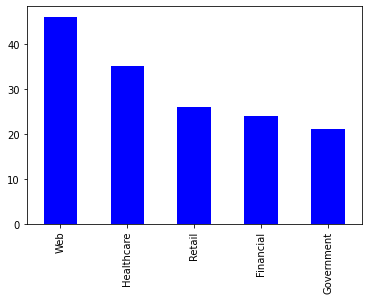

In [203]:
data['Industry'].value_counts().head(5).plot(kind='bar', color='blue')
# Its clear from it that Web industry is mostly attacked. 
# Top 5 attacked industries are 
# Web, Healthcare, Retail, Financial and Government.

So through prediction analysis it can be predicted that the Web Industries of USA has major chance of getting attacked. So USA needs more cyber security requirements to cope up with this.

Thank You !